In [3]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from Linearity import Neuron
from IPython.display import set_matplotlib_formats
import scipy.stats as ss
from pickle import dump, load
plt.style.use('neuron')

In [4]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

## 1 B (CA3 heatmap)

In [3]:
ca3_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160927/c4_CA3_CPP/plots/c4_CA3_CPP.pkl')

In [4]:
AP_dict = np.zeros((12,12))
SubThP_dict = np.zeros((12,12))
for expType, exp in ca3_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            temp_coord = []
            temp_value = []
            for trial in exp[1].coordwise[coord].trials:
                temp_coord.append(trial.AP_flag)
                if not trial.AP_flag:
                    temp_value.append(trial.feature[0])
            SubThP_dict[list(coord)[0]] = np.nanmean(temp_value)        
            AP_dict[list(coord)[0]] = np.nansum(temp_coord)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


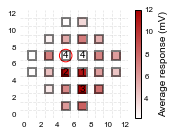

In [5]:
SubThP_dict = np.ma.masked_where(SubThP_dict == 0., SubThP_dict)

vmax = np.nanmax(SubThP_dict)
vmin = np.nanmin(SubThP_dict)
cmap = LinearSegmentedColormap.from_list('CA3_reds', [(0., 'white'), (1., (170/256., 0, 0))])
cmap.set_bad(color='white')


fig, ax = plt.subplots()
heatmap = ax.pcolormesh(SubThP_dict, cmap=cmap, vmin=vmin, vmax=vmax)

# mark a specific square?
zeros = np.zeros((12,12))
stim_coords = np.where(SubThP_dict>0)
zeros[stim_coords] = 1.
stim_coords = np.where(AP_dict>0)
zeros[stim_coords] = 1.

c = np.ma.masked_array(zeros, zeros == 0.)  # mask squares where value == 1
ax.pcolormesh(np.arange(13), np.arange(13), c, alpha=0.5, zorder=2, facecolor='none', edgecolors='k',
               cmap='gray', linewidth=1.)

for y in range(AP_dict.shape[0]):
    for x in range(AP_dict.shape[1]):
        if AP_dict[y, x] > 0:
            plt.text(x + 0.5, y + 0.5, "{}".format(int(AP_dict[y, x])),
                     horizontalalignment='center',
                     verticalalignment='center', size=10)

circle1 = plt.Circle((5.5, 7.5), 0.75, color='r', fill=False)

ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(1,13), minor=True)
    axis.set(ticks=np.arange(0,13,2)+0.5, ticklabels=np.arange(0,13,2)) #Skipping square labels

ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')
ax.set_xlim((0,13))
ax.set_ylim((0,13))

#Colorbar stuff
cbar = plt.colorbar(heatmap, label="Average response (mV)")
cbar.ax.get_yaxis().labelpad = 6
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

ax.add_artist(circle1)
ax.set_aspect(1)
fig.set_figheight(2.)
fig.set_figwidth(2.5)
simpleaxis(ax,every=True,outward=False)
dump(fig,file('figures/fig1/1b.pkl','wb'))
plt.show()

In [6]:
SubThP_dict

masked_array(data =
 [[-- -- -- -- -- -- -- -- -- -- -- --]
 [-- -- -- -- -- 6.14416344370693 -- 8.269799757748842 -- -- -- --]
 [-- -- -- -- -- -- -- -- -- -- -- --]
 [-- -- -- 3.1626716097816825 -- 6.810883412603289 -- 12.007118083536625 --
  7.69824803294614 -- --]
 [-- -- -- -- -- -- -- -- -- -- -- --]
 [-- 2.3243233310058713 -- 4.665551430545747 -- 11.868490874767303 --
  11.214277539402246 -- 5.984869498293847 -- 4.456282816361636]
 [-- -- -- -- -- -- -- -- -- -- -- --]
 [-- 2.198784192558378 -- 7.19675592565909 -- nan -- nan --
  6.962982543744147 -- 5.9837163425982]
 [-- -- -- -- -- -- -- -- -- -- -- --]
 [-- -- -- 2.78597881924361 -- 5.524707886856049 -- 7.250924390275031 --
  5.279446817934513 -- --]
 [-- -- -- -- -- -- -- -- -- -- -- --]
 [-- -- -- -- -- 2.3613553876057267 -- 3.7182261259295046 -- -- -- --]],
             mask =
 [[ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True False  True False  True  True  True  Tru

## 1 E (CA3 jitter) Example cell

2.72904410164


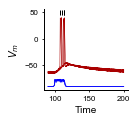

In [7]:
fig, ax = plt.subplots()
AP_dict = np.zeros((12,12))
tsp = []
initTime = 1800
for expType, exp in ca3_neuron:
    if expType == "Control":
        for trial in exp[1].coordwise[frozenset([(7,5)])].trials:
            totalWindow = exp[1].marginOfInterest[1] - exp[1].marginOfBaseline[0]
            totalTime = np.linspace(0., (totalWindow*1e3/exp[1].F_sample), totalWindow)
            photodiode = trial.photodiode[exp[1].marginOfBaseline[0]: exp[1].marginOfInterest[1]]*5e1
            voltage = trial.voltage[exp[1].marginOfBaseline[0]: exp[1].marginOfInterest[1]]*1e3
            ax.plot(totalTime[initTime:], voltage[initTime:], color=(170/256., 0, 0))
            ax.plot(totalTime[initTime:], photodiode[initTime:] - 90, color='b')
            tsp.append(totalTime[np.argmax(voltage)])
ax.set_xlabel("Time")
ax.set_ylabel("$V_m$")
ax.plot(tsp, [50]*len(tsp), 'k|', markersize=5)
print(np.std(tsp, ddof = 1))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
ax.xaxis.set_tick_params(size=2)
ax.yaxis.set_tick_params(size=2)
dump(fig,file('figures/fig1/1e.pkl','wb'))
plt.show()

### Jitter example cell

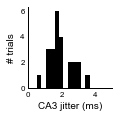

In [8]:
fig, ax = plt.subplots()
AP_dict = np.zeros((12,12))
jitter = []
for expType, exp in ca3_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            tsp = []
            for trial in exp[1].coordwise[coord].trials:
                time = np.linspace(0,100,len(trial.interestWindow))
                tsp.append(time[np.argmax(trial.interestWindow)])
            jitter.append(np.std(tsp, ddof = 1))
ax.set_xlabel("CA3 jitter (ms)")
ax.set_ylabel("# trials")
bins = np.linspace(0,5,20)
ax.hist(jitter, bins=bins)
ax.set_xlim((0,5))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
# dump(fig,file('figures/fig1/1f.pkl','wb'))
plt.show()

## 1 F (CA3 jitter distribution)

In [6]:
neuronList = []
prefix = '/home/bhalla/Documents/Codes/data'
with open(prefix + "/media/sahil/NCBS_Shares_BGStim/patch_data/CA3_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", prefix + fileList[i])
            neuronList.append(Neuron.load(prefix + fileList[i]))
        except:
            print ("Couldn't read",prefix + fileList[i])
print ("Read {} files.".format(len(fileList)))

Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160927/c4_CA3_CPP/plots/c4_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160928/c2_CA3_CPP/plots/c2_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160928/c1_CA3_CPP/plots/c1_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c2_CA3_CPP/plots/c2_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161026/c2_CA3_CPP/plots/c2_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161027/c2_CA3_CPP/plots/c2_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161027/c1_CA3_CPP/plots/c1_CA3_CPP.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170104/c2_CA3_CPP/plots/c2_CA3_CPP.pkl
Read 8 f

### Control cells

<Linearity.Neuron instance at 0x7f2ee9c76cf8>
<Linearity.Neuron instance at 0x7f2ef3b4f3f8>
<Linearity.Neuron instance at 0x7f2ee9650488>
<Linearity.Neuron instance at 0x7f2ee99023b0>
<Linearity.Neuron instance at 0x7f2ee9902758>
<Linearity.Neuron instance at 0x7f2ee98538c0>
<Linearity.Neuron instance at 0x7f2f0fb51998>
<Linearity.Neuron instance at 0x7f2ee9eccb90>


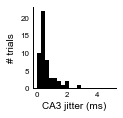

Num trials is 52, median is 0.445011746197


In [7]:
AP_dict = np.zeros((12,12))
jitter = []
average_spk_time = []
squares = 1

for ca3_neuron in neuronList:
    if ca3_neuron is not None:
        print (ca3_neuron)
        for expType, exp in ca3_neuron:
            if expType == "Control":
                for coord in exp[squares].coordwise:
                    tsp = []
                    for trial in exp[squares].coordwise[coord].trials:
                        if trial.AP_flag:
                            time = np.linspace(0,100,len(trial.interestWindow))
                            tsp.append(time[np.argmax(trial.interestWindow)])
                    average_spk_time+=tsp
                    if len(tsp)>2:
                        jitter.append(np.std(tsp, ddof = 1))
                        #jitter.append(np.max(tsp) - np.min(tsp))

fig, ax = plt.subplots()
ax.set_xlabel("CA3 jitter (ms)")
ax.set_ylabel("# trials")
bins = np.linspace(0,5,20)
ax.hist(jitter, bins=bins)
# ax.set_xlim((0,3))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
dump(fig,file('figures/fig1/1f.pkl','wb'))
plt.show()
print("Num trials is {}, median is {}".format(len(jitter), np.median(jitter)))

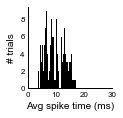

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel("Avg spike time (ms)")
ax.set_ylabel("# trials")
# bins = np.linspace(0,5,20)
bins=50
ax.hist(average_spk_time, bins=bins)
ax.set_xlim((0,30))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
plt.show()

### GABAzine cells

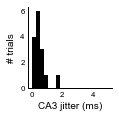

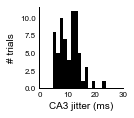

In [9]:
AP_dict = np.zeros((12,12))
jitter = []
average_spk_time = []
squares = 1

for ca3_neuron in neuronList:
    if ca3_neuron is not None:
        for expType, exp in ca3_neuron:
            if expType == "GABAzine":
                for coord in exp[squares].coordwise:
                    tsp = []
                    for trial in exp[squares].coordwise[coord].trials:
                        if trial.AP_flag:
                            time = np.linspace(0,100,len(trial.interestWindow))
                            tsp.append(time[np.argmax(trial.interestWindow)])
                    average_spk_time+=tsp
                    if len(tsp)>2:
                        jitter.append(np.std(tsp, ddof = 1))
                        #jitter.append(np.max(tsp) - np.min(tsp))

fig, ax = plt.subplots()
ax.set_xlabel("CA3 jitter (ms)")
ax.set_ylabel("# trials")
bins = np.linspace(0,5,20)
ax.hist(jitter, bins=bins)
# ax.set_xlim((0,3))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
# dump(fig,file('figures/fig1/1e.pkl','wb'))
plt.show()


fig, ax = plt.subplots()
ax.set_xlabel("CA3 jitter (ms)")
ax.set_ylabel("# trials")
# bins = np.linspace(0,5,20)
bins=15
ax.hist(average_spk_time, bins=bins)
ax.set_xlim((0,30))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
# dump(fig,file('figures/fig1/1e.pkl','wb'))
plt.show()

## 1 G (Desensitization of CA3)

### Example cell

In [13]:
ca3_cell = '/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c2_CA3_CPP/CPP/desensitization_161013_c2.txt'

In [14]:
desenCell = np.loadtxt(ca3_cell, delimiter=',')

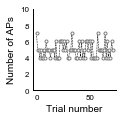

In [15]:
fig, ax = plt.subplots()
ax.plot(desenCell, 'o--', markersize=3, mfc='1', markeredgecolor='0.5')
# ax.bar(range(len(desenCell)), desenCell)
ax.set_ylim(0,10)
ax.set_xlabel("Trial number")
ax.set_ylabel("Number of APs")
simpleaxis(ax)
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
# dump(fig,file('figures/fig1/1m.pkl','wb'))
plt.show()

### Population distribution

In [10]:
def figureG(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    #Colorscheme for squares
    color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}
    numNeurons = 0
    numPSP = 0
    axisPlotted = []
    line_counter = 0
    fig, ax = plt.subplots()
    neurons_valid = []
    squares_valid = []
    for neuron in neuronList:
        if neuron is not None:
            for experiment in neuron.experiment:
                if experiment == "Control":    
                    numNeurons+=1
                    for squares in neuron.experiment[experiment]:
                        triad = []
                        numAP = 0
                        nSq = neuron.experiment[experiment][squares].trial
                        if len(nSq) >=47 and len(nSq) < 73 :
                            neurons_valid.append (neuron.date + '_' + neuron.index)
                            squares_valid.append(squares)
                            for trialnum in nSq:
                                if nSq[trialnum].AP_flag:
                                    numAP+=1
                                else:
                                    numPSP+=1
                                if (trialnum+1)%24 == 0:
                                    triad.append(numAP/24.)
                                    numAP = 0
                            axisPlotted.append(ax.plot(range(len(triad)), triad, 'o--', c=color_sqr[squares], label=squares, markersize=3))
                            line_counter+=1
    plt.xlabel("# Iteration")
    plt.ylabel("Spiking prob.")
    plt.xticks([0,1,2])
    simpleaxis(ax)
    ax.set_xticklabels([1,2,3])
    fig.set_figheight(1.)
    fig.set_figwidth(1.5)
    dump(fig,file('figures/fig1/1m.pkl','wb'))
    plt.show()
    print ("Total number of neurons = {}, squares valid = {}, number of lines = {}".format(len(set(neurons_valid)), len(squares_valid), line_counter))

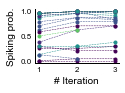

Total number of neurons = 7, squares valid = 24, number of lines = 24


In [11]:
figureG()

## 1 C (CA1 heatmap)

In [18]:
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c1/plots/c1.pkl')

In [19]:
coordwise = ca1_neuron.experiment["Control"][1].coordwise
epsp_dict = np.zeros((12,12))

for coord in coordwise:
    epsp_dict[list(coord)[0]] = coordwise[coord].average_feature[0]

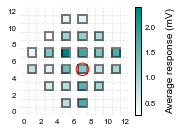

In [20]:
epsp_dict = np.ma.masked_where(epsp_dict == 0., epsp_dict)

vmax = np.max(epsp_dict)
vmin = np.min(epsp_dict)
cmap = LinearSegmentedColormap.from_list('CA1_blues', [(0., 'white'), (1., (0,.5,.5,1.))])
cmap.set_bad(color='white')

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(epsp_dict, cmap=cmap, vmin=vmin, vmax=vmax)
circle1 = plt.Circle((7.5, 5.5), 0.75, color='r', fill=False)

ax.set_title("CA1 cell response")

# mark a specific square?
zeros = np.zeros((12,12))
stim_coords = np.where(epsp_dict>0)
zeros[stim_coords] = 1.
c = np.ma.masked_array(zeros, zeros == 0.)  # mask squares where value == 1
ax.pcolormesh(np.arange(13), np.arange(13), c, alpha=0.5, zorder=2, facecolor='none', edgecolors='k',
               cmap='gray', linewidth=1.)

ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(1,13), minor=True)
    axis.set(ticks=np.arange(0,13,2)+0.5, ticklabels=np.arange(0,13,2)) #Skipping square labels

ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')

ax.set_xlim((0,13))
ax.set_ylim((0,13))

# Colorbar stuff
cbar = plt.colorbar(heatmap, label="Average response (mV)")
cbar.ax.get_yaxis().labelpad = 10
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

ax.add_artist(circle1)
ax.set_aspect(1)
simpleaxis(ax, every=True, outward=False)

fig.set_figheight(2.)
fig.set_figwidth(2.5)
dump(fig,file('figures/fig1/1c.pkl','wb'))
plt.show()

## 1 H (CA1 jitter distribution) Traces Example Cell

3.76436152043


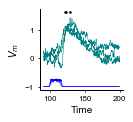

In [21]:
fig, ax = plt.subplots()
tsp = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for trial in exp[1].coordwise[frozenset([(5,7)])].trials:

            totalWindow = exp[1].marginOfInterest[1] - exp[1].marginOfBaseline[0]
            totalTime = np.linspace(0., (totalWindow*1e3/exp[1].F_sample), totalWindow)
            
            photodiode = trial.photodiode[exp[1].marginOfBaseline[0]: exp[1].marginOfInterest[1]]*0.1e1
            voltage = trial._filter(filter=ca1_neuron.filtering, trace=trial.voltage)
            voltage, baseline = trial._normalizeToBaseline(voltage, voltage[exp[1].marginOfBaseline[0]:exp[1].marginOfBaseline[1]])
            voltage = voltage[exp[1].marginOfBaseline[0]: exp[1].marginOfInterest[1]]*1e3
            
            ax.plot(totalTime[initTime:], voltage[initTime:], color=(0,.5,.5))
            ax.plot(totalTime[initTime:], photodiode[initTime:] - 1., color='b')
            tsp.append(totalTime[np.argmax(voltage)])
            
ax.set_xlabel("Time")
ax.set_ylabel("$V_m$")
ax.plot(tsp, [1.6]*len(tsp), 'k.', markersize=3)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
print(np.std(tsp, ddof=1))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
ax.xaxis.set_tick_params(size=2)
ax.yaxis.set_tick_params(size=2)
dump(fig,file('figures/fig1/1g.pkl','wb'))
plt.show()

## CA1 jitter example cell

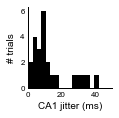

In [22]:
fig, ax = plt.subplots()
ca1_jitter = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            tsp = []
            for trial in exp[1].coordwise[coord].trials:
                time = np.linspace(0,100,len(trial.interestWindow))
                tsp.append(time[np.argmax(trial.interestWindow)])
            ca1_jitter.append(np.std(tsp, ddof = 1))
ax.set_xlabel("CA1 jitter (ms)")
ax.set_ylabel("# trials")
bins = np.linspace(0,50,20)
ax.hist(ca1_jitter, bins=bins)
ax.set_xlim((0,50))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
dump(fig,file('figures/fig1/1h.pkl','wb'))
plt.show()

## CA1 amplitude variability 

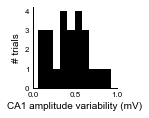

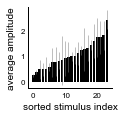

In [23]:
ca1_amp_jitter = []
average_psp = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            amp = []
            for trial in exp[1].coordwise[coord].trials:
                amp.append(trial.feature[0])
            average_psp.append(exp[1].coordwise[coord].average_feature[0])
            ca1_amp_jitter.append(np.std(amp, ddof = 1))
            
fig, ax = plt.subplots()
ax.set_xlabel("CA1 amplitude variability (mV)")
ax.set_ylabel("# trials")
bins = 10
ax.hist(ca1_amp_jitter, bins=bins)
ax.set_xlim((0,1))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
# dump(fig,file('figures/fig1/1i.pkl','wb'))
plt.show()

fig, ax = plt.subplots()
average_psp = np.array(average_psp)
indices = np.argsort(average_psp)
ca1_amp_jitter = np.array(ca1_amp_jitter)
ax.bar(np.arange(len(average_psp)), average_psp[indices], yerr = ca1_amp_jitter[indices], ecolor='0.5')
ax.set_xlabel("sorted stimulus index")
ax.set_ylabel("average amplitude")
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
# dump(fig,file('figures/fig1/1j.pkl','wb'))
plt.show()

### Fano factor example cell

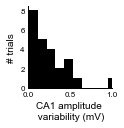

In [24]:
ca1_amp_jitter = []
average_psp = []
means = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            amp = []
            for trial in exp[1].coordwise[coord].trials:
                amp.append(trial.feature[0])
            average_psp.append(exp[1].coordwise[coord].average_feature[0])
            ca1_amp_jitter.append(np.var(amp, ddof = 1)/np.mean(amp))
            means.append(np.mean(amp))
            
fig, ax = plt.subplots()
ax.set_xlabel("CA1 amplitude \n variability (mV)")
ax.set_ylabel("# trials")
bins = 10
ax.hist(ca1_amp_jitter, bins=bins)
ax.set_xlim((0,1))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
# dump(fig,file('figures/fig1/1i.pkl','wb'))
plt.show()

## Binomial process generated plots

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


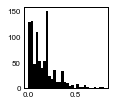

In [25]:
repeats = 3
maxSynapses = 30
rel_p = 0.2
C = []
numSynapses = np.random.choice(range(maxSynapses), 1000)
for n in numSynapses:
    synapseOut = []
    for j in range(repeats):
        synapseOut.append(0.2*np.random.binomial(n=n, p = rel_p))
    coeff = np.nanvar(synapseOut, ddof = 1)/np.nanmean(synapseOut)
    if not np.isnan(coeff):
        C.append(coeff)
bins = 30
fig, ax = plt.subplots()
# ax.set_xlim((0,1))
# n = np.linspace(1,50,50)
# C = 2./np.sqrt(n)
# print (C)
ax.hist(C,bins=bins)
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
plt.show()

Population statistics

In [36]:
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", fileList[i])
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print ("Couldn't read", fileList[i])
print ("Read {} files.".format(len(fileList)))

('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160126/c3/plots/c3.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160209/c4/plots/c4.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160219/c5/plots/c5.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160223/c2/plots/c2.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160223/c3/plots/c3.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160513/c5/plots/c5.pkl')
('Reading ', '/media/sahil/NCBS_Shares_BGStim/patch_data/160617/c5/plots/c5.pkl')
('Reading ', '/m

In [ ]:
# neuronList = load(open('/home/bhalla/Documents/Codes/data/currentClampCells.pkl','rb'))

## 1 I CA1 variability (Fano factor) all cells

In [42]:
def figureI(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    epsp_1sq = []
    squares = 1
    feature = 0
    numBins = 200
    ca1_amp_jitter = []
    valid_neurons = []
    for neuron in neuronList:
        if neuron is not None:
#             print (neuron)
            for expType, exp in neuron:
                if expType == "Control":
                    for coord in exp[1].coordwise:
                        amp = []
                        for trial in exp[1].coordwise[coord].trials:
#                             print (coord, trial.feature)
                            if trial.feature:
                                if trial.feature[0] > 0: ## Removing negatives
                                    amp.append(trial.feature[0])
#                         average_psp.append(exp[1].coordwise[coord].average_feature[0])
                        if len(amp) > 2:
                            coeff_var = np.nanvar(amp, ddof = 1)/np.nanmean(amp)
                            if not np.isnan(coeff_var):
                                ca1_amp_jitter.append(coeff_var)
                                valid_neurons.append(neuron.date + '_' + neuron.index)
#                         means.append(np.mean(amp))
        #print (np.mean(epsp_1sq), np.median(epsp_1sq), ss.mode(epsp_1sq))

    ca1_amp_jitter = np.array(ca1_amp_jitter)
    print (np.min(ca1_amp_jitter), np.max(ca1_amp_jitter))
    print (len(np.where(ca1_amp_jitter<0.5)[0])/float(len(ca1_amp_jitter)))
    print("Number of inputs = {}".format(len(ca1_amp_jitter)))
    print (ca1_amp_jitter[np.where(ca1_amp_jitter<0)])
    print ("Number of neurons = {}".format(len(set(valid_neurons))))
    fig, ax = plt.subplots()
    ax.set_xlabel("CA1 peak \n var/mean (mV)")
    ax.set_ylabel("# trials")
    bins = 30
    ax.hist(ca1_amp_jitter,bins=bins)
    ax.set_xlim(xmin=-0.1)
    ax.set_ylim(ymin=0,ymax=200)
    fig.set_figheight(1.5)
    fig.set_figwidth(1.5)
    simpleaxis(ax)
    dump(fig,file('figures/fig1/1i.pkl','wb'))
    plt.show()

(0.00074170819036654837, 2.4673939167134744)
0.847482014388
Number of inputs = 695
[]
Number of neurons = 28


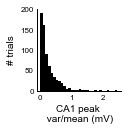

In [43]:
figureI()

## 1 J (distribution of EPSP one squares)

In [48]:
def figureJ(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    epsp_1sq = []
    squares = 1
    feature = 0
    numBins = 200
    valid_neurons = []
    for neuron in neuronList:
        if neuron is not None:
            try:
                trials = neuron.experiment["Control"][squares].trial
                for trialNum in trials:
                    trial = neuron.experiment["Control"][squares].trial[trialNum]
                    epsp_1sq.append(trial.feature[feature])
                    valid_neurons.append(neuron.date + '_' + neuron.index)
            except:
                print("{}, {}: No control dataset!".format(neuron.index, neuron.date))
    #print (np.mean(epsp_1sq), np.median(epsp_1sq), ss.mode(epsp_1sq))
    print("Number of trials = {}".format(len(epsp_1sq)))
    print("Number of neurons = {}".format(len(set(valid_neurons))))
    print(ss.kstest(epsp_1sq, "lognorm", ss.lognorm.fit(epsp_1sq)))
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(epsp_1sq, bins=numBins)
    maxBin = np.argmax(n)
    modeEPSP = bins[maxBin]
    print ("Mode is at ", modeEPSP)
    ymin, ymax = ax.get_ylim()
    ax.vlines(modeEPSP,ymin,ymax, linestyles='--', linewidth=1., color='0.7')
    ax.annotate("{:.2f} mV".format(modeEPSP), xy=(modeEPSP, ymax), xytext=(1.2*modeEPSP, ymax), textcoords='data')
    ax.set_xlabel("PSP Amplitude (mV)")
    ax.set_ylabel("# recorded PSPs")
    fig.set_figheight(1.5)
    fig.set_figwidth(1.5)
    simpleaxis(ax, outward=False)
    dump(fig,file('figures/fig1/1j.pkl','wb'))
    plt.show()

c1, 170802: No control dataset!
5_c4_160122, RS_TBS_short: No control dataset!
Number of trials = 8845
Number of neurons = 38
KstestResult(statistic=0.10973007245541189, pvalue=6.2574699249949013e-93)
('Mode is at ', 0.24567256009587446)


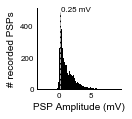

In [49]:
figureJ()

## 1 L (Fraction of APs and sublinear responses) Supplementary

In [45]:
def figureL(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    numNeurons = 0
    numAP = 0
    numPSP = 0
    for neuron in neuronList:
        if neuron is not None:
            for experiment in neuron.experiment:
                if experiment == "Control":    
                    numNeurons+=1
                    for squares in neuron.experiment[experiment]:
                        nSq = neuron.experiment[experiment][squares].trial
                        for trialnum in nSq:
                            if nSq[trialnum].AP_flag:
                                numAP+=1
                            else:
                                numPSP+=1
    
    fracAPs = float(numAP)/numPSP
    fig, ax = plt.subplots()
    index = np.arange(2)
    width = 0.5
    ax.bar(index, (numPSP, numAP), width)
    ax.set_title("CA1 responses")
    ax.set_ylabel("Frequency")
    ax.set_xticks(index)
    ax.set_xticklabels(('PSP', 'AP'))
    #ax.set_yticks(list(ax.get_yticks()) + [numAP])
    ax.annotate("{:.2f} %".format(fracAPs*1e2), xy=(0.8, numAP*2.0), xytext=(0.75, numAP*5), textcoords='data')
    xaxisVal = ax.get_xlim()[0]
    ax.hlines(numAP, xaxisVal, index[1],linestyle="--")
    fig.set_figheight(1.5)
    fig.set_figwidth(1.5)
    ax.set_ylim(0,22500)
#     ax.set_yscale('log')
    simpleaxis(ax, outward=False)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    dump(fig,file('figures/fig1/1l.pkl','wb'))
    plt.show()
    print ("Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs))

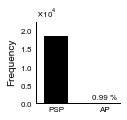

Legend text: Number of cells: 38, number of points: 18668, fraction of APS: 0.00989991885312


In [47]:
figureL()

## 1 M (Desensitization of CA3)
### Example cell

In [ ]:
# ca3_cell = '/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c2_CA3_CPP/CPP/desensitization_161013_c2.txt'
# desenCell = np.loadtxt(ca3_cell, delimiter=',')
# fig, ax = plt.subplots()
# ax.plot(desenCell, 'o--', markersize=3, mfc='1', markeredgecolor='0.5')
# # ax.bar(range(len(desenCell)), desenCell)
# ax.set_ylim(0,10)
# ax.set_xlabel("Trial number")
# ax.set_ylabel("Number of APs")
# simpleaxis(ax)
# fig.set_figheight(1.5)
# fig.set_figwidth(1.5)
# #dump(fig,file('figures/fig1/1m.pkl','wb'))
# plt.show()

### Population distribution of spikes and subthreshold

In [ ]:
# def figureL(feature = 0):
#     ''' Get's the fraction of times an AP occurs verus PSPs '''
#     numNeurons = 0
#     numAP = 0
#     numPSP = 0
#     for neuron in neuronList:
#         if neuron is not None:
#             for experiment in neuron.experiment:
#                 if experiment == "Control":    
#                     numNeurons+=1
#                     for squares in neuron.experiment[experiment]:
#                         nSq = neuron.experiment[experiment][squares].trial
#                         for trialnum in nSq:
#                             if nSq[trialnum].AP_flag:
#                                 numAP+=1
#                             else:
#                                 numPSP+=1
    
#     fracAPs = float(numAP)/numPSP
#     fig, ax = plt.subplots()
#     index = np.arange(2)
#     width = 0.5
#     ax.bar(index, (numPSP, numAP), width)
#     ax.set_title("CA1 responses")
#     ax.set_ylabel("Frequency")
#     ax.set_xticks(index)
#     ax.set_xticklabels(('PSP', 'AP'))
#     #ax.set_yticks(list(ax.get_yticks()) + [numAP])
#     ax.annotate("{:.2f} %".format(fracAPs*1e2), xy=(0.8, numAP*2.0), xytext=(0.75, numAP*5), textcoords='data')
#     xaxisVal = ax.get_xlim()[0]
#     ax.hlines(numAP, xaxisVal, index[1],linestyle="--")
#     fig.set_figheight(1.5)
#     fig.set_figwidth(1.5)
#     ax.set_ylim(0,22500)
# #     ax.set_yscale('log')
#     simpleaxis(ax, outward=False)
#     ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     ax.yaxis.major.formatter._useMathText = True
#     dump(fig,file('figures/fig1/1l.pkl','wb'))
#     plt.show()
#     print ("Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs))